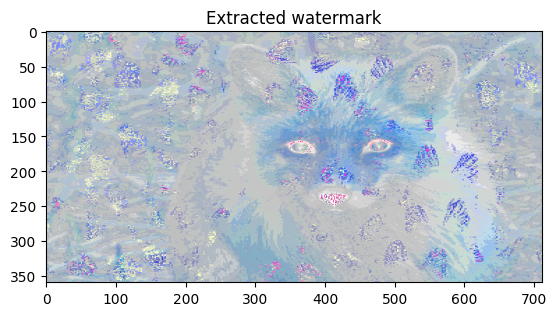

In [33]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

def ext_watermark(A, B, C):

    host = cv2.imread(A)
    m, n, p = host.shape
    
    coeffs_host = pywt.dwt2(host, 'haar')
    host_LL, (host_LH, host_HL, host_HH) = coeffs_host

    water_mark = cv2.imread(B)
    water_mark = cv2.resize(water_mark, (n, m))

    coeffs_water_mark = pywt.dwt2(water_mark, 'haar')
    water_mark_LL, (water_mark_LH, water_mark_HL, water_mark_HH) = coeffs_water_mark

    wm = cv2.imread(C)

    coeffs_wm = pywt.dwt2(wm, 'haar')
    wm_LL, (wm_LH, wm_HL, wm_HH) = coeffs_wm

    extracted_watermark = (wm_LL - host_LL) / 0.03

    ext = pywt.idwt2((extracted_watermark, (water_mark_LH, water_mark_HL, water_mark_HH)), 'haar')

    plt.imshow(np.uint8(ext))
    plt.title('Extracted watermark')
    plt.show()

# Call the function with example file names
ext_watermark('colors.png', 'fox.png', 'Watermarked.png')
